<a href="https://colab.research.google.com/github/sheelasivakumar/Vertical-Training-Python-/blob/main/Salary_prediction_(03_feb_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Dataset into Dataframe
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Python Vertical Training/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
df.shape

(16, 4)

In [ ]:
# Checking for Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [ ]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [ ]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [ ]:
df['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [ ]:
df['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [ ]:
df['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [ ]:
deg_vs_sal = pd.crosstab(df['degree'],df['salary_more_then_100k'])
deg_vs_sal

salary_more_then_100k,0,1
degree,,
bachelors,4,4
masters,2,6


<Axes: xlabel='degree'>

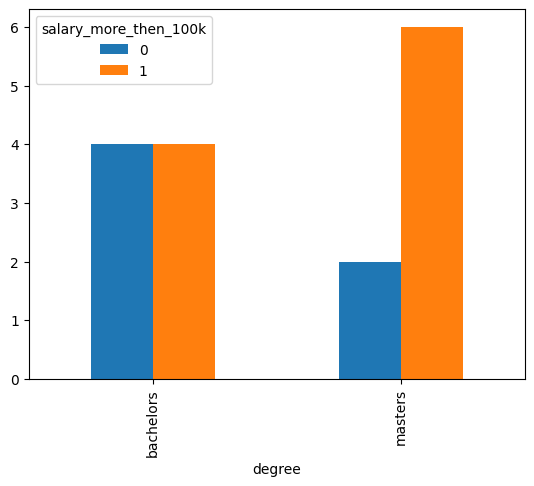

In [ ]:
deg_vs_sal.plot(kind = "bar")

In [ ]:
com_vs_sal = pd.crosstab(df['company'],df['salary_more_then_100k'])
com_vs_sal

salary_more_then_100k,0,1
company,,
abc pharma,3,1
facebook,0,6
google,3,3


<Axes: xlabel='company'>

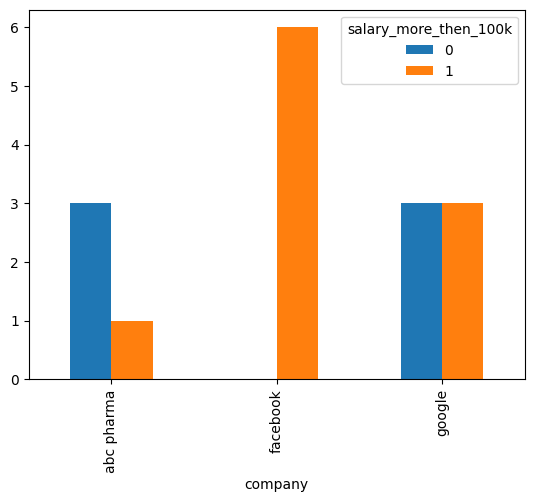

In [ ]:
com_vs_sal.plot(kind = "bar")

In [ ]:
job_vs_sal = pd.crosstab(df['job'],df['salary_more_then_100k'])
job_vs_sal

salary_more_then_100k,0,1
job,,
business manager,1,5
computer programmer,2,3
sales executive,3,2


<Axes: xlabel='job'>

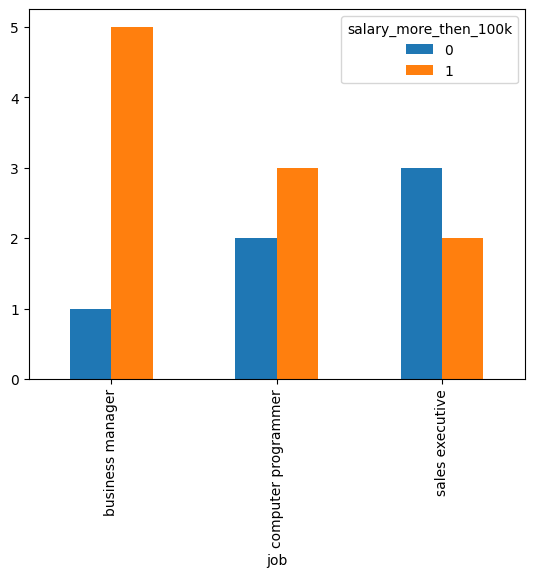

In [ ]:
job_vs_sal.plot(kind = "bar")

In [ ]:
df = pd.get_dummies(df,dtype = 'int')
df.head()

,salary_more_then_100k,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,1,0,1
2,1,0,0,1,1,0,0,1,0
3,1,0,0,1,1,0,0,0,1
4,0,0,0,1,0,1,0,1,0


In [ ]:
# SPlitting Features
X = df.drop(columns = ['salary_more_then_100k'])
Y = df['salary_more_then_100k']

In [ ]:
X.head()

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0


In [ ]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [ ]:
# Training and Testing Set Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.15)
print(f"x_train : {x_train.shape}\ny_train : {y_train.shape}\nx_test : {x_test.shape}\ny_test : {y_test.shape}")

x_train : (13, 8)
y_train : (13,)
x_test : (3, 8)
y_test : (3,)


In [ ]:
# Model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [ ]:
# Accuracy
log_model_acc = model.score(x_train.values,y_train.values)
print(f"Accuracy of Logistic Model : {log_model_acc}")

Accuracy of Logistic Model : 0.9230769230769231


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [ ]:
# Accuracy
dec_model_acc = model.score(x_train.values,y_train.values)
print(f"Accuracy of Decision tree Model : {dec_model_acc}")

Accuracy of Decision tree Model : 0.9230769230769231


In [ ]:
df.columns

Index(['salary_more_then_100k', 'company_abc pharma', 'company_facebook',
       'company_google', 'job_business manager', 'job_computer programmer',
       'job_sales executive', 'degree_bachelors', 'degree_masters'],
      dtype='object')

#### **Note**:
As Both Logistic Regression and Decision Tree Models give the same accuracy we can use any of the model

In [ ]:
n = int(input("Enter no of Employee : "))

for i in range(n):
  company_abc = 0
  company_fb = 0
  company_google = 0
  business_manager = 0
  programmer = 0
  executive = 0
  b = 0
  m = 0
  company = input("Enter Company Name (google / facebook / abc):").capitalize()
  job = input("Enter Job Position (business manager / programmer / executive): ").capitalize()
  degree = input("Enter your degree (bachelors/ Masters): ").capitalize()
  if company == "Abc":
    company_abc = 1
  elif company == "Google":
    company_google = 1
  elif company == "Facebook":
    company_fb = 1

  if job == "Business manager":
    business_manager = 1
  elif job == "Programmer":
    programmer = 1
  elif job == "Executive":
    executive = 1

  if degree == "Bachelors":
    b = 1
  elif degree == "Masters" :
    m = 1

  ans = model.predict([[company_abc,company_fb,company_google,business_manager,programmer,executive,b,m]])
  print(f"Salary is more than  100k : {ans}")


Enter no of Employee : 2
Enter Company Name (google / facebook / abc):google
Enter Job Position (business manager / programmer / executive): programmer
Enter your degree (bachelors/ Masters): masters
Salary is more than  100k : [1]
Enter Company Name (google / facebook / abc):abc
Enter Job Position (business manager / programmer / executive): programmer
Enter your degree (bachelors/ Masters): masters
Salary is more than  100k : [1]
